<a href="https://colab.research.google.com/github/marreapato/2pl-project-cin/blob/main/Papers_on_data_spaces_agentic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Papers in General arxiv

In [1]:
!pip install bertopic sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install arxiv pandas matplotlib


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=e49250f4aafbb96723d42bea513e18d5672fa990752e49a87e81535fb53165bf
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [4]:
import arxiv
import pandas as pd

search = arxiv.Search(
    query='("dataspaces" OR "data spaces" OR "data space" OR "dataspace")',
    max_results=500,
    sort_by=arxiv.SortCriterion.SubmittedDate

)

papers = []

for result in search.results():
    papers.append({
        "title": result.title,
        "abstract": result.summary,
        "published": result.published,
        "categories": result.categories
    })

df = pd.DataFrame(papers)
print(len(df))


/tmp/ipython-input-795123417.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


500


In [5]:
agentic_keywords = [
    "agentic",
    "intelligent agent",
    "autonomous agent",
    "multi-agent",
    "agent-based"
]


In [6]:
def mentions_agentic(text):
    text = text.lower()
    return any(keyword in text for keyword in agentic_keywords)

df["agentic"] = df["abstract"].apply(mentions_agentic)


In [7]:
counts = df["agentic"].value_counts()
print(counts)


agentic
False    498
True       2
Name: count, dtype: int64


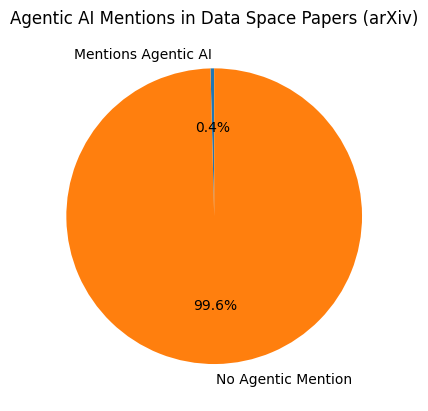

In [11]:
import matplotlib.pyplot as plt

labels = ["Mentions Agentic AI", "No Agentic Mention"]
values = [
    counts.get(True, 0),
    counts.get(False, 0)
]

plt.figure()
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Agentic AI Mentions in Data Space Papers (arXiv)")
plt.show()


In [21]:
agentic_df = df[df["agentic"] == True]
print(agentic_df["abstract"].head())


19     The Open Digital Rights Language (ODRL) is a pivotal standard for automating data rights management. However, the inherent logical complexity of authorization policies, combined with the scarcity of high-quality "Natural Language-to-ODRL" training datasets, impedes the ability of current methods to efficiently and accurately translate complex rules from natural language into the ODRL format. To address this challenge, this research leverages the potent comprehension and generation capabilities of Large Language Models (LLMs) to achieve both automation and high fidelity in this translation process. We introduce AgentODRL, a multi-agent system based on an Orchestrator-Workers architecture. The architecture consists of specialized Workers, including a Generator for ODRL policy creation, a Decomposer for breaking down complex use cases, and a Rewriter for simplifying nested logical relationships. The Orchestrator agent dynamically coordinates these Workers, assembling an optimal pat

In [22]:
agentic_df

,title,abstract,published,categories,agentic,clean_abstract
19,AgentODRL: A Large Language Model-based Multi-agent System for ODRL Generation,"The Open Digital Rights Language (ODRL) is a pivotal standard for automating data rights management. However, the inherent logical complexity of authorization policies, combined with the scarcity of high-quality ""Natural Language-to-ODRL"" training datasets, impedes the ability of current methods to efficiently and accurately translate complex rules from natural language into the ODRL format. To address this challenge, this research leverages the potent comprehension and generation capabilities of Large Language Models (LLMs) to achieve both automation and high fidelity in this translation process. We introduce AgentODRL, a multi-agent system based on an Orchestrator-Workers architecture. The architecture consists of specialized Workers, including a Generator for ODRL policy creation, a Decomposer for breaking down complex use cases, and a Rewriter for simplifying nested logical relationships. The Orchestrator agent dynamically coordinates these Workers, assembling an optimal pathway based on the complexity of the input use case. Specifically, we enhance the ODRL Generator by incorporating a validator-based syntax strategy and a semantic reflection mechanism powered by a LoRA-finetuned model, significantly elevating the quality of the generated policies. Extensive experiments were conducted on a newly constructed dataset comprising 770 use cases of varying complexity, all situated within the context of data spaces. The results, evaluated using ODRL syntax and semantic scores, demonstrate that our proposed Orchestrator-Workers system, enhanced with these strategies, achieves superior performance on the ODRL generation task.",2025-11-29 19:19:50+00:00,"[cs.MA, cs.AI]",True,open digital rights language odrl pivotal standard automating data rights management however inherent logical complexity authorization policies combined scarcity highquality natural languagetoodrl training datasets impedes ability current methods efficiently accurately translate complex rules natural language odrl format address challenge research leverages potent comprehension generation capabilities large language models llms achieve automation high fidelity translation process introduce agentodrl multiagent system based orchestratorworkers architecture architecture consists specialized workers including generator odrl policy creation decomposer breaking complex use cases rewriter simplifying nested logical relationships orchestrator agent dynamically coordinates workers assembling optimal pathway based complexity input use case specifically enhance odrl generator incorporating validatorbased syntax strategy semantic reflection mechanism powered lorafinetuned model significantly elevating quality generated policies extensive experiments conducted newly constructed dataset comprising use cases varying complexity situated within context data spaces results evaluated using odrl syntax semantic scores demonstrate proposed orchestratorworkers system enhanced strategies achieves superior performance odrl generation task
102,Automation and Feature Selection Enhancement with Reinforcement Learning (RL),"Effective feature selection, representation and transformation are principal steps in machine learning to improve prediction accuracy, model generalization and computational efficiency. Reinforcement learning provides a new perspective towards balanced exploration of optimal feature subset using multi-agent and single-agent models. Interactive reinforcement learning integrated with decision tree improves feature knowledge, state representation and selection efficiency, while diversified teaching strategies improve both selection quality and efficiency. The state representation can further be enhanced by scanning features sequentially along with the usage of convolutional auto-encoder. Monte Carlo-based reinforced feature sele

In [23]:


pd.set_option('display.max_colwidth', None)


In [25]:
agentic_df[["title","published"]].iloc[[0]]

,title,published
19,AgentODRL: A Large Language Model-based Multi-agent System for ODRL Generation,2025-11-29 19:19:50+00:00


In [26]:
agentic_df = agentic_df.iloc[[0]]

In [27]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["clean_abstract"] = df["abstract"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipython-input-275579754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agentic_df["clean_abstract"] = agentic_df["abstract"].apply(clean_text)


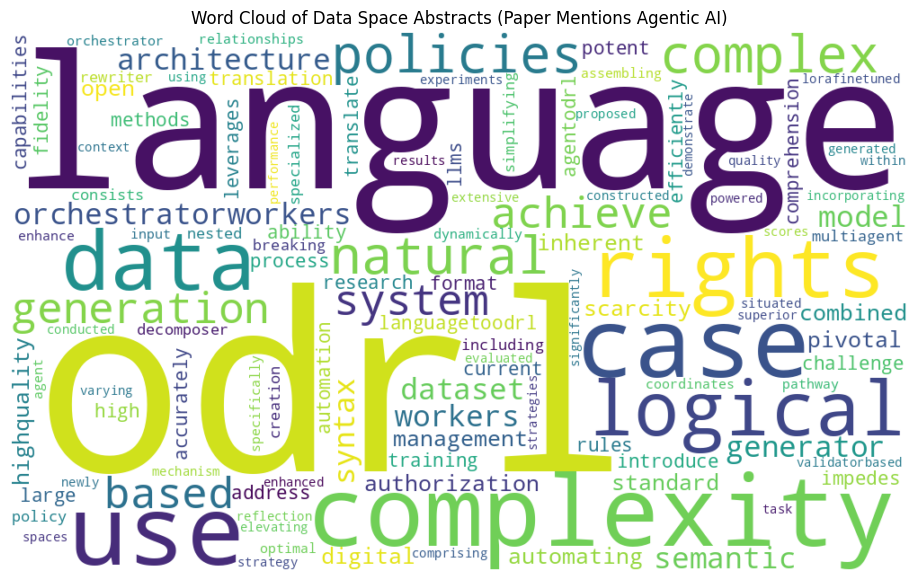

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

agentic_df["clean_abstract"] = agentic_df["abstract"].apply(clean_text)

all_text = " ".join(agentic_df["clean_abstract"])

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    max_words=200
).generate(all_text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Data Space Abstracts (Paper Mentions Agentic AI)")
plt.show()


# OpenAlex

trying with cursor

In [32]:
import requests
import pandas as pd
import time

url = "https://api.openalex.org/works"

cs_ai_concept_id = "C41008148"  # AI
ml_concept_id = "C86803228"     # Machine Learning

all_papers = []
per_page = 200
total_results = 1

# Filter by year
years = [2024,2025,2026]
year_filter = "|".join(map(str, years))

# Keywords
agentic_keywords = ["agentic AI"]#, "multi-agent"]#"autonomous agent", "intelligent agent", "multi-agent", "agent-based"]  # you can add more if needed
sustainable_keywords = ["dataspace", "dataspaces", "data space","data spaces"]

# First request cursor
cursor = "*"

while cursor:
    params = {
        "filter": f"concepts.id:{cs_ai_concept_id}|{ml_concept_id},publication_year:{year_filter}",
        "search": " OR ".join(agentic_keywords),
        "per-page": per_page,
        "cursor": cursor
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Stop if no results
    if "results" not in data or len(data["results"]) == 0:
        print("No more results.")
        break

    # Set total results from first response
    if total_results == 1:
        total_results = data["meta"]["count"]
        print(f"Total Agentic AI papers matching query: {total_results}")

    for item in data["results"]:
        abstract_dict = item.get("abstract_inverted_index", None)
        abstract_text = " ".join(abstract_dict.keys()) if abstract_dict else ""
        title_text = item.get("title", "")

        text_combined = f"{title_text} {abstract_text}".lower()
        is_sustainable = any(keyword in text_combined for keyword in sustainable_keywords)

        all_papers.append({
            "title": title_text,
            "abstract": abstract_text,
            "doi": item.get("doi"),
            "year": item.get("publication_year"),
            "authors": [a["author"]["display_name"] for a in item.get("authorships", [])],
            "sustainable_ai": is_sustainable
        })

    print(f"Collected {len(all_papers)} papers so far.")
    # Update cursor for next batch
    cursor = data["meta"].get("next_cursor", None)
    time.sleep(1)


Total Agentic AI papers matching query: 34293
Collected 200 papers so far.
Collected 400 papers so far.
Collected 600 papers so far.
Collected 800 papers so far.
Collected 1000 papers so far.
Collected 1200 papers so far.
Collected 1400 papers so far.
Collected 1600 papers so far.
Collected 1800 papers so far.
Collected 2000 papers so far.
Collected 2200 papers so far.
Collected 2400 papers so far.
Collected 2600 papers so far.
Collected 2800 papers so far.
Collected 3000 papers so far.
Collected 3200 papers so far.
Collected 3400 papers so far.
Collected 3600 papers so far.
Collected 3800 papers so far.
Collected 4000 papers so far.
Collected 4200 papers so far.
Collected 4400 papers so far.
Collected 4600 papers so far.
Collected 4800 papers so far.
Collected 5000 papers so far.
Collected 5200 papers so far.
Collected 5400 papers so far.
Collected 5600 papers so far.
Collected 5800 papers so far.
Collected 6000 papers so far.
Collected 6200 papers so far.
Collected 6400 papers so far

In [34]:

df = pd.DataFrame(all_papers)
print(f"Total papers collected: {len(df)}")

# Count overlap with Sustainable AI
overlap_sustainable = df["sustainable_ai"].sum()
print(f"Papers also mentioning Data Spaces: {overlap_sustainable}")


Total papers collected: 34293
Papers also mentioning Data Spaces: 15


In [35]:
df

,title,abstract,doi,year,authors,sustainable_ai
0,Agentic AI: Autonomous Intelligence for Complex Goals—A Comprehensive Survey,"Agentic AI, an emerging paradigm in artificial intelligence, refers to autonomous systems designed pursue complex goals with minimal human intervention. Unlike traditional which depends on structured instructions and close oversight, AI demonstrates adaptability, advanced decision-making capabilities self-sufficiency, enabling it operate dynamically evolving environments. This survey thoroughly explores the foundational concepts, unique characteristics, core methodologies driving development of AI. We examine its current potential applications across various fields, including healthcare, finance, adaptive software systems, emphasizing advantages deploying agentic real-world scenarios. The paper also addresses ethical challenges posed by proposing solutions for goal alignment, resource constraints, environmental adaptability. outline a framework safely effectively integrating into society, highlighting need further research considerations ensure beneficial societal impacts. serves as comprehensive introduction guiding researchers, developers, policymakers engaging transformative responsibly creatively.",https://doi.org/10.1109/access.2025.3532853,2025,"[Deepak Bhaskar Acharya, Karthigeyan Kuppan, B Divya]",False
1,"AI Agents vs. Agentic AI: A Conceptual Taxonomy, Applications and Challenges","This review critically distinguishes between AI Agents and Agentic AI, offering a structured, conceptual taxonomy, application mapping, analysis of opportunities challenges to clarify their divergent design philosophies capabilities. We begin by outlining the search strategy foundational definitions, characterizing as modular systems driven enabled LLMs LIMs for taskspecific automation. Generative is positioned precursor providing foundation, with agents advancing through tool integration, prompt engineering, reasoning enhancements. then characterize systems, which, in contrast Agents, represent paradigm shift marked multi-agent collaboration, dynamic task decomposition, persistent memory, coordinated autonomy. Through chronological evaluation architectural evolution, operational mechanisms, interaction styles, autonomy levels, we present comparative across both agentic paradigms. Application domains such customer support, scheduling, data summarization are contrasted deployments research automation, robotic coordination, medical decision support. further examine unique each including hallucination, brittleness, emergent behavior, coordination failure, propose targeted solutions ReAct loops, retrieval-augmented generation (RAG), automation layers, causal modeling. work aims provide roadmap developing robust, scalable, explainable AI-driven systems.",https://doi.org/10.70777/si.v2i3.15161,2025,"[Ranjan Sapkota, Konstantinos I. Roumeliotis, Manoj Karkee]",False
2,Agent AI: Surveying the Horizons of Multimodal Interaction,"Multi-modal AI systems will likely become a ubiquitous presence in our everyday lives. A promising approach to making these more interactive is embody them as agents within physical and virtual environments. At present, leverage existing foundation models the basic building blocks for creation of embodied agents. Embedding such environments facilitates ability process interpret visual contextual data, which critical sophisticated context-aware systems. For example, system that can perceive user actions, human behavior, environmental objects, audio expressions, collective sentiment scene be used inform direct agent responses given environment. To accelerate research on agent-based multimodal intelligence, we define ""Agent AI"" class stimuli, language inputs, other environmentally-grounded produce meaningful actions. In particular, explore aim improve based next-embodied action prediction by incorporating external knowledge, multi-sensory feedback. We argue developing agentic grounded environments, 

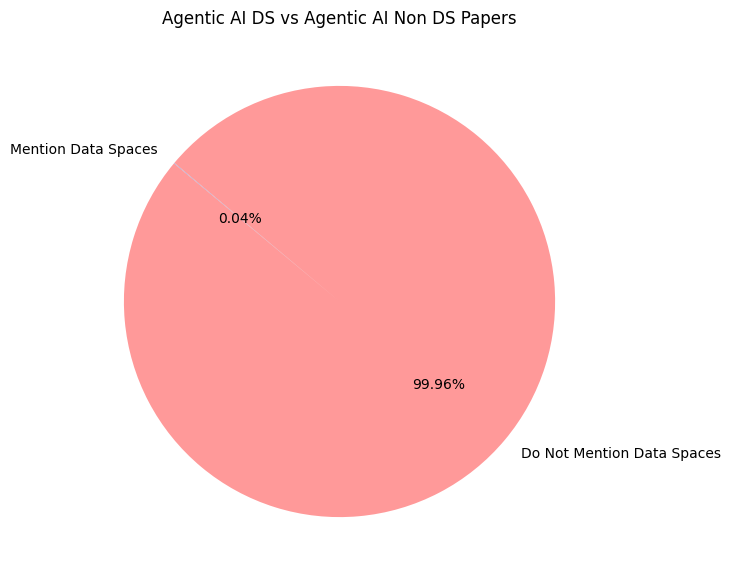

In [42]:
import matplotlib.pyplot as plt

# If your column is named 'agentic_ai' and contains True/False
counts = df['sustainable_ai'].value_counts()

labels = ['Mention Data Spaces', 'Do Not Mention Data Spaces']
sizes = [counts.get(True, 0), counts.get(False, 0)]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Agentic AI DS vs Agentic AI Non DS Papers')
plt.show()


In [40]:
sizes

[np.int64(15), np.int64(34278)]

In [39]:
counts

,count
sustainable_ai,
False,34278
True,15


In [44]:
df_ds = df[df['sustainable_ai'] == True].copy()
print(f"Total papers mentioning Data Spaces: {len(df_ds)}")


Total papers mentioning Data Spaces: 15


In [45]:
df_ds

,title,abstract,doi,year,authors,sustainable_ai
2283,Multi-Agent RAG Chatbot Architecture for Decision Support in Net-Zero Emission Energy Systems,"Modern energy platforms are increasingly leveraging Artificial Intelligence (AI) for effective decision-making and efficient operations. This has led to the development of expansive data spaces that comprise both structured unstructured in various modalities. Conversational agents with most recent advancements Large Language Models (LLM) primed facilitate retrieval this diverse information decision support. In paper, we propose a multi-agent chatbot architecture support net-zero emissions systems, LLMs Retrieval-Augmented Generation (RAG). consists Chatbot User Interface (UI), an advanced Natural Understanding (NLU) module precise entity intent recognition, robust Core four specialized agents: Observer, Knowledge Retriever, Behavior Analyzer, Visualizer Response Construction Module. These components work together address needs environments, specifically net zero carbon initiatives need consider parameters large volumes data. We showcase chatbot's successful integration evaluation system tertiary education institution.",https://doi.org/10.1109/icit58233.2024.10540920,2024,"[Gihan Gamage, Nishan Mills, Daswin De Silva, Milos Manic, Harsha Moraliyage, Andrew Jennings, Damminda Alahakoon]",True
6267,AI Based Solutions for Manufacturing Mass Customization,"Abstract This paper analyses how to solve the challenges in implementation of Mass Customization manufacturing using Artificial Intelligence agents/services/tools. Considering that humans alone cannot cope with mass customization due huge amount information, it is required AI based solutions help take decisions. We consider those must communicate other order obtain a holistic improvement (this Multi Agent System concept). More detail, this addresses identified when agents use external data coming from outside company, so Data Space guaranteeing secure transaction and ownership sovereignty required. presents implemented several projects address created by requirements on a-the scalability Manufacturing, b-for multi-Agent AI-based systems for c-implementing Spaces.",https://doi.org/10.1007/978-3-031-86489-6_19,2025,"[Luis Usatorre, Paula Morella, Iñigo Sedano, Sergio Clavijo, Andrés Aguayo]",True
6551,UNIFIED LATENT INTELLIGENCE PHILOSOPHY (LIP) FRAMEWORK (ULF),"Unified Latent Intelligence Philosophy (LIP) Framework (ULF): A Global Standard for Autonomous AI Governance Abstract: The (ULF) is a pioneering meta-governance model designed to manage the ""Latent Intelligence"" of advanced systems. As moves toward autonomy (Agentic AI), traditional reactive ethics are no longer sufficient. ULF introduces Prevention-First architectural paradigm, ensuring that ethical guardrails embedded within AI's internal decision-making layers before deployment. This framework provides core theoretical and operational foundations used across 23 specialized sectors. It addresses ""Black Box"" problem by establishing: LIP Protocol: methodology identifying auditing hidden biases emergent behaviors in latent data spaces. Architecture: scalable system aligning machine intelligence with human values, legal standards, societal safety. Cross-Sectoral Integration: blueprint how diverse industries (from Healthcare National Security) can share common DNA while maintaining sector-specific protocols. an essential resource researchers, global policy-makers, enterprise architects seeking robust, future-proof solution challenges 2026 beyond.",https://doi.org/10.5281/zenodo.18019219,2025,[Allan John Nalam],True
6554,UNIFIED LATENT INTELLIGENCE PHILOSOPHY (LIP) FRAMEWORK (ULF),"Unified Latent Intelligence Philosophy (LIP) Framework (ULF): A Global Standard for Autonomous AI Governance Abstract: The (ULF) is a pioneering meta-governance model designed to manage the ""Latent Intelligence"" of advanced systems. As moves toward autonomy (Agentic AI), traditional reactive ethics 

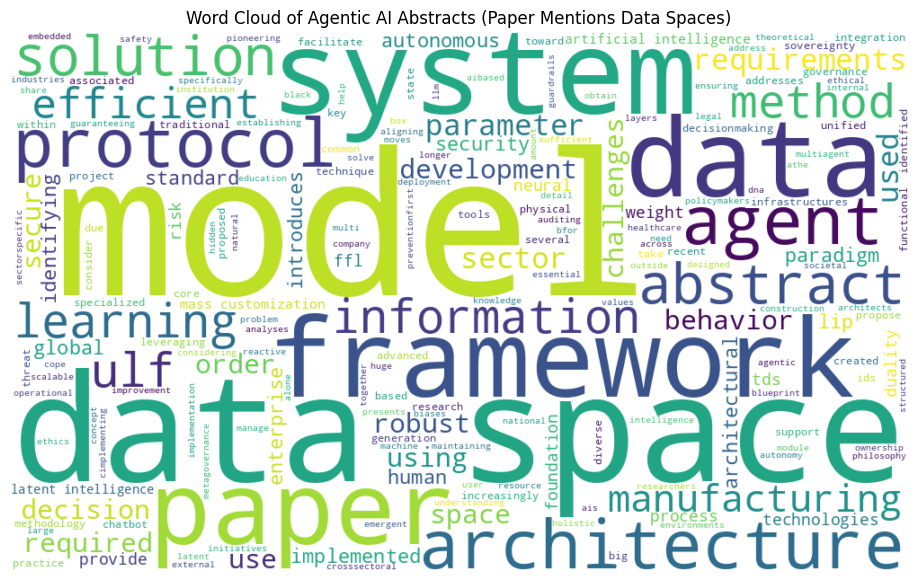

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_ds["clean_abstract"] = df_ds["abstract"].apply(clean_text)

all_text = " ".join(df_ds["clean_abstract"])

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    max_words=200
).generate(all_text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Agentic AI Abstracts (Paper Mentions Data Spaces)")
plt.show()


In [47]:
df_ds.to_csv("agentic_mention_ds_papers.csv")

Checking sustainability

In [ ]:
import requests
import pandas as pd
import time

url = "https://api.openalex.org/works"

cs_ai_concept_id = "C41008148"  # AI
ml_concept_id = "C86803228"     # Machine Learning

all_papers = []
per_page = 200
total_results = 1

# Filter by year
years = [2024,2025]
year_filter = "|".join(map(str, years))

# Keywords
agentic_keywords = ["agentic AI", "multi-agent","autonomous agent", "intelligent agent", "multi-agent", "agent-based"]  # you can add more if needed
sustainable_keywords = ["data spaces", "dataspaces", "dataspace","data s[ace]"]

# First request cursor
cursor = "*"

while cursor:
    params = {
        "filter": f"concepts.id:{cs_ai_concept_id}|{ml_concept_id},publication_year:{year_filter}",
        "search": " OR ".join(sustainable_keywords),
        "per-page": per_page,
        "cursor": cursor
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Stop if no results
    if "results" not in data or len(data["results"]) == 0:
        print("No more results.")
        break

    # Set total results from first response
    if total_results == 1:
        total_results = data["meta"]["count"]
        print(f"Total Agentic AI papers matching query: {total_results}")

    for item in data["results"]:
        abstract_dict = item.get("abstract_inverted_index", None)
        abstract_text = " ".join(abstract_dict.keys()) if abstract_dict else ""
        title_text = item.get("title", "")

        text_combined = f"{title_text} {abstract_text}".lower()
        is_agentic = any(keyword in text_combined for keyword in agentic_keywords)

        all_papers.append({
            "title": title_text,
            "abstract": abstract_text,
            "doi": item.get("doi"),
            "year": item.get("publication_year"),
            "authors": [a["author"]["display_name"] for a in item.get("authorships", [])],
            "agentic_ai": is_agentic
        })

    print(f"Collected {len(all_papers)} papers so far.")
    # Update cursor for next batch
    cursor = data["meta"].get("next_cursor", None)
    time.sleep(1)


Total Agentic AI papers matching query: 54929
Collected 200 papers so far.
Collected 400 papers so far.
Collected 600 papers so far.
Collected 800 papers so far.
Collected 1000 papers so far.
Collected 1200 papers so far.
Collected 1400 papers so far.
Collected 1600 papers so far.
Collected 1800 papers so far.
Collected 2000 papers so far.
Collected 2200 papers so far.
Collected 2400 papers so far.
Collected 2600 papers so far.
Collected 2800 papers so far.
Collected 3000 papers so far.
Collected 3200 papers so far.
Collected 3400 papers so far.
Collected 3600 papers so far.
Collected 3800 papers so far.
Collected 4000 papers so far.
Collected 4200 papers so far.
Collected 4400 papers so far.
Collected 4600 papers so far.
Collected 4800 papers so far.
Collected 5000 papers so far.
Collected 5200 papers so far.
Collected 5400 papers so far.
Collected 5600 papers so far.
Collected 5800 papers so far.
Collected 6000 papers so far.
Collected 6200 papers so far.
Collected 6400 papers so far

In [ ]:

df = pd.DataFrame(all_papers)
print(f"Total papers collected: {len(df)}")

# Count overlap with Sustainable AI
overlap_sustainable = df["agentic_ai"].sum()
print(f"Papers also mentioning Agentic AI: {overlap_sustainable}")


Total papers collected: 54929
Papers also mentioning Agentic AI: 387


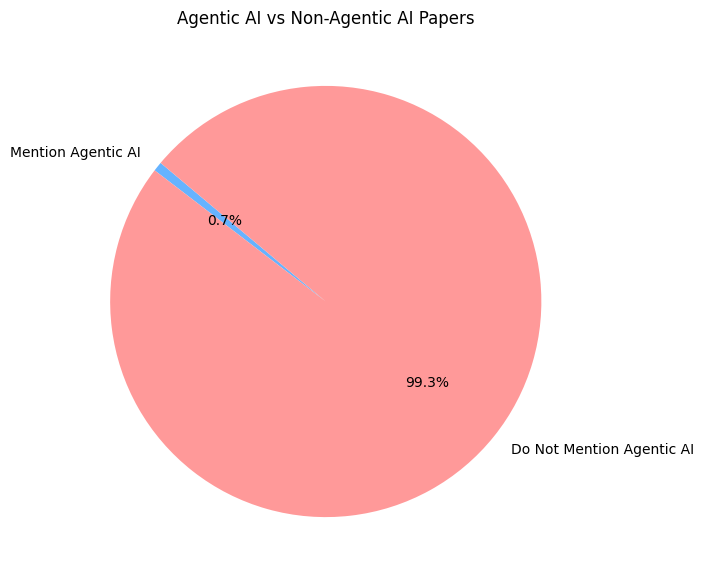

In [ ]:
import matplotlib.pyplot as plt

# If your column is named 'agentic_ai' and contains True/False
counts = df['agentic_ai'].value_counts()

labels = ['Mention Agentic AI', 'Do Not Mention Agentic AI']
sizes = [counts.get(True, 0), counts.get(False, 0)]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Agentic AI vs Non-Agentic AI Papers')
plt.show()


In [ ]:
df_agentic = df[df['agentic_ai'] == True].copy()
print(f"Total papers mentioning Agentic AI: {len(df_agentic)}")


Total papers mentioning Agentic AI: 387


In [ ]:
df_agentic

,title,abstract,doi,year,authors,agentic_ai
175,Learning from Nature to Achieve Material Susta...,Nature has severely outpaced humans in develop...,https://doi.org/10.21428/e4baedd9.33bd7449,2024,"[Rachel K. Luu, Sofia Arevalo, Wei Lu, Bo Ni, ...",True
659,Agentic AI for Sustainable Development: Levera...,The convergence of agent-based modeling (ABM) ...,https://doi.org/10.1177/27523543251365678,2025,"[J Liu, Chu Chu, Yilin Zhao, Goshi Aoki, Z. J....",True
724,Digital Trust in Transition: Student Perceptio...,In the context of rapid digitalization higher ...,https://doi.org/10.3390/su17177567,2025,"[Aikumis Omirali, Kanat Kozhakhmet, Rakhima Zh...",True
946,Sustainable AI & Agricultural Technologies,"Climate change, increase in world population a...",None,2024,"[Stefan Sarkadi (17244541), Louise Manning (17...",True
1057,Distributed service caching with deep reinforc...,Increasing reliance on large-scale AI models h...,https://doi.org/10.1016/j.dcan.2024.11.009,2024,"[Wei Liu, Muhammad Bilal, Yuzhe Shi, Xiaolong Xu]",True
...,...,...,...,...,...,...
54419,A robot scheduling method based on rMAPPO for ...,The H-beam riveting and welding work cell is a...,https://doi.org/10.1371/journal.pone.0331515,2025,"[Jianbin Zheng, Chengzhi Zhou, Yang Gao, Ziyao...",True
54426,WITHDRAWN,There are public debates concerning the meanin...,https://doi.org/10.31234/osf.io/u6wqy,2024,[Naomi Y. Mbelekani],True
54485,Design Optimization of NOMA Aided Multi-STAR-R...,Non-orthogonal multiple access (NOMA) enables ...,https://doi.org/10.48550/arxiv.2406.13280,2024,"[Yu Min Park, Sheikh Salman Hassan, Yan Kyaw T...",True
54717,Towards Multi-agent Reinforcement Learning bas...,Traffic signal control systems (TSCSs) are int...,https://doi.org/10.48550/arxiv.2404.11014,2024,"[Kang Wang, Zhishu Shen, Zhen Lei, Tiehua Zhang]",True


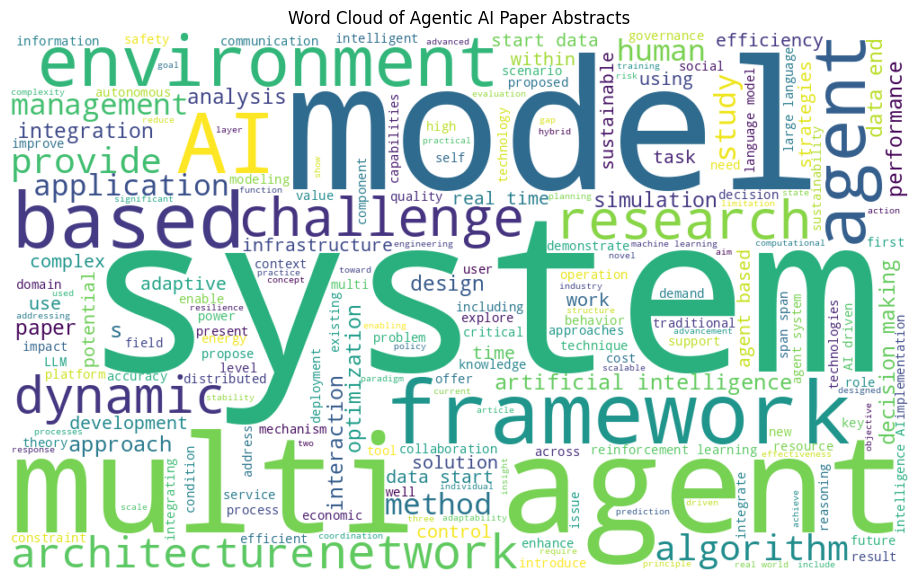

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all abstracts into one large string
text = " ".join(df_agentic['abstract'].dropna())

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Agentic AI Paper Abstracts")
plt.show()


In [ ]:
df_agentic.to_csv("agentic_sust_papers.csv")

for non agentic

In [ ]:
dfnon_agentic = df[df['agentic_ai'] == False].copy()
print(f"Total papers not mentioning Agentic AI: {len(dfnon_agentic)}")


Total papers not mentioning Agentic AI: 54542


In [ ]:
dfnon_agentic

,title,abstract,doi,year,authors,agentic_ai
0,Green and sustainable AI research: an integrat...,Abstract This investigation delves into Green ...,https://doi.org/10.1186/s40537-024-00920-x,2024,"[Raghu Raman, Debidutta Pattnaik, Hiran H. Lat...",False
1,Towards sustainable AI: a comprehensive framew...,Abstract The rapid advancement of artificial i...,https://doi.org/10.1007/s43621-024-00641-4,2024,"[Abdulaziz Tabbakh, Al Amin, Mahbubul Islam, G...",False
2,Sustainable AI,The rapid advancement of artificial intelligen...,https://doi.org/10.1201/9781003457176-1,2024,"[Dipti Chauhan, Pritika Bahad, Jay Kumar Jain]",False
3,Sustainable AI-Driven Applications for Plant C...,,https://doi.org/10.1007/978-981-99-9621-6_16,2024,"[Muhammad Naveed, Nafeesa Zahid, Ibtihaj Fatim...",False
4,<scp>AI</scp>‐driven adaptive learning for sus...,Abstract This paper scrutinizes how adaptive l...,https://doi.org/10.1002/sd.3221,2024,"[Wadim Striełkowski, Вероника Гребенникова, Al...",False
...,...,...,...,...,...,...
54924,Recent advances in stimuli-responsive framewor...,Although all molecular assemblies show some de...,https://doi.org/10.26434/chemrxiv-2025-gdx77-v3,2025,[François‐Xavier Coudert],False
54925,Bridging Data and Hardware Gap for Efficient M...,Recent research in deep learning models has ac...,https://doi.org/10.7302/25047,2024,[Haizhong Zheng],False
54926,None,,https://doi.org/10.55858//prohis03022024-02,2024,"[Lada, Mehdiyeva]",False
54927,Økonomi for planlæggere,,https://doi.org/10.54337/aau779669822,2025,[Poul Thøis Madsen],False


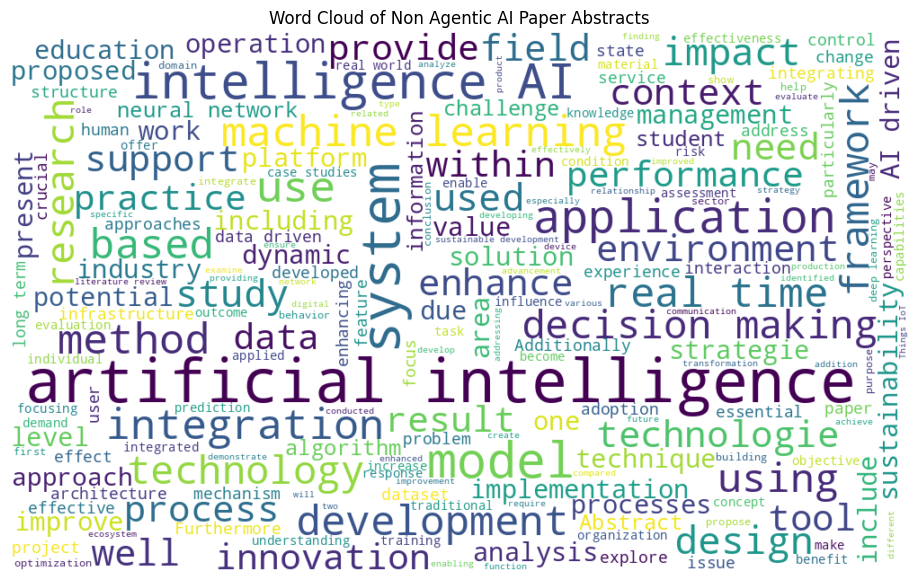

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all abstracts into one large string
text = " ".join(dfnon_agentic['abstract'].dropna())

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Non Agentic AI Paper Abstracts")
plt.show()


for agentic only

In [ ]:
# Create agentic_only column
df['agentic_only'] = df['abstract'].fillna("").str.lower().str.contains("agentic")

# Check the result
print(df[['title', 'agentic_only']].head())

# Count how many papers are agentic_only
print("Total Agentic-only papers:", df['agentic_only'].sum())


                                               title  agentic_only
0  Green and sustainable AI research: an integrat...         False
1  Towards sustainable AI: a comprehensive framew...         False
2                                     Sustainable AI         False
3  Sustainable AI-Driven Applications for Plant C...         False
4  <scp>AI</scp>‐driven adaptive learning for sus...         False
Total Agentic-only papers: 160


In [ ]:
df_agentic_only = df[df['agentic_only'] == True].copy()
print(f"Total papers mentioning Agentic AI: {len(df_agentic_only)}")


Total papers mentioning Agentic AI: 160


In [ ]:
df_agentic_only

,title,abstract,doi,year,authors,agentic_ai,agentic_only
156,SustAI-SCM: Intelligent Supply Chain Process A...,Sustainable supply chain management (SCM) dema...,https://doi.org/10.3390/su17062453,2025,[Batin Latif Aylak],False,True
695,Collaborative Agentic AI for Global Resource M...,This study explores the potential of collabora...,https://doi.org/10.54660/.ijmrge.2024.5.2.1023...,2024,[Sananda Kundu],False,True
1109,"Who is Responsible? The Data, Models, Users or...",Generative AI is moving rapidly from research ...,https://doi.org/10.48550/arxiv.2502.08650,2025,"[Shaina Raza, Rizwan Qureshi, Anwar Zahid, Jos...",False,True
1316,Why human–AI relationships need socioaffective...,Humans strive to design safe AI systems that a...,https://doi.org/10.1057/s41599-025-04532-5,2025,"[Hannah Rose Kirk, Iason Gabriel, Chris Summer...",False,True
1320,Next-generation agentic AI for transforming he...,Artificial Intelligence (AI) is transforming t...,https://doi.org/10.1016/j.infoh.2025.03.001,2025,[Nalan Karunanayake],False,True
...,...,...,...,...,...,...,...
45317,Generative AI in Investment and Portfolio Mana...,Generative Artificial Intelligence (GenAI) is ...,https://doi.org/10.55524/ijirem.2025.12.3.1,2025,[Satyadhar Joshi],False,True
45717,Agentic AI in Personalization: How LLMs Are Po...,Traditional personalization systems fail to ma...,https://doi.org/10.59573/emsj.9(3).2025.48,2025,[Rohit Upadhyay],False,True
51814,Mining Multimodal Fatigue Data Using Reasoning...,The scarcity and expense of fatigue data limit...,https://doi.org/10.26434/chemrxiv-2025-xwd6c,2025,"[Jyoti Prakash Mohanty, Akhil Thomas, Tresa M....",False,True
52715,Students’ Engagement in Mathematics with Virtu...,This study assessed the impact of a localized ...,https://doi.org/10.9734/ajpas/2024/v26i12693,2024,"[Ekemini T. Akpan, Nseabasi Peter Essien, Ekon...",False,True


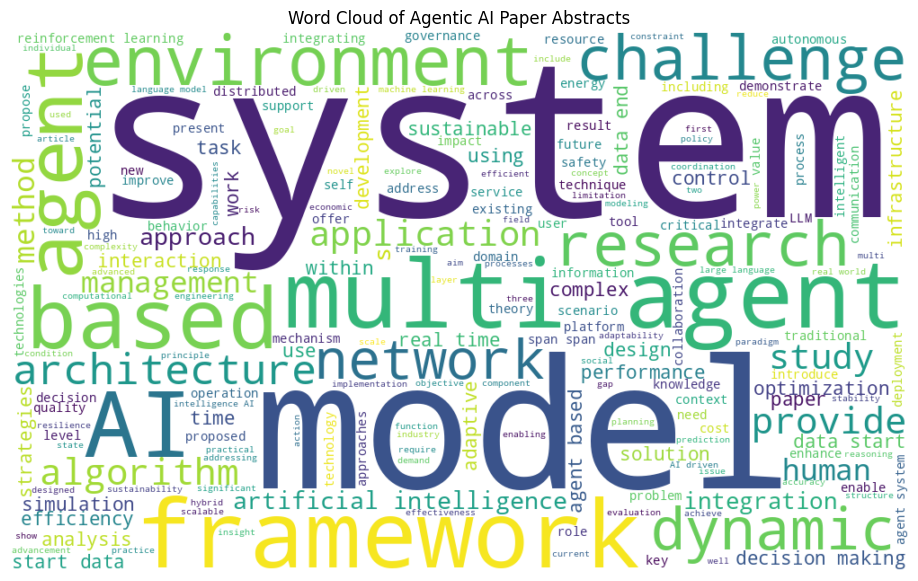

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all abstracts into one large string
text = " ".join(df_agentic['abstract'].dropna())

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Agentic AI Paper Abstracts")
plt.show()


# saving df to csv

In [ ]:
df.columns

Index(['title', 'abstract', 'doi', 'year', 'authors', 'agentic_ai',
       'agentic_only'],
      dtype='object')

In [ ]:
df_no_agcols = df.drop(['agentic_ai',
       'agentic_only'],axis=1)
df_no_agcols.to_csv("sustainable_ai_papers.csv",header=False)

In [ ]:
df_no_agcols

,title,abstract,doi,year,authors
0,Green and sustainable AI research: an integrat...,Abstract This investigation delves into Green ...,https://doi.org/10.1186/s40537-024-00920-x,2024,"[Raghu Raman, Debidutta Pattnaik, Hiran H. Lat..."
1,Towards sustainable AI: a comprehensive framew...,Abstract The rapid advancement of artificial i...,https://doi.org/10.1007/s43621-024-00641-4,2024,"[Abdulaziz Tabbakh, Al Amin, Mahbubul Islam, G..."
2,Sustainable AI,The rapid advancement of artificial intelligen...,https://doi.org/10.1201/9781003457176-1,2024,"[Dipti Chauhan, Pritika Bahad, Jay Kumar Jain]"
3,Sustainable AI-Driven Applications for Plant C...,,https://doi.org/10.1007/978-981-99-9621-6_16,2024,"[Muhammad Naveed, Nafeesa Zahid, Ibtihaj Fatim..."
4,<scp>AI</scp>‐driven adaptive learning for sus...,Abstract This paper scrutinizes how adaptive l...,https://doi.org/10.1002/sd.3221,2024,"[Wadim Striełkowski, Вероника Гребенникова, Al..."
...,...,...,...,...,...
54924,Recent advances in stimuli-responsive framewor...,Although all molecular assemblies show some de...,https://doi.org/10.26434/chemrxiv-2025-gdx77-v3,2025,[François‐Xavier Coudert]
54925,Bridging Data and Hardware Gap for Efficient M...,Recent research in deep learning models has ac...,https://doi.org/10.7302/25047,2024,[Haizhong Zheng]
54926,None,,https://doi.org/10.55858//prohis03022024-02,2024,"[Lada, Mehdiyeva]"
54927,Økonomi for planlæggere,,https://doi.org/10.54337/aau779669822,2025,[Poul Thøis Madsen]


reading csv

In [ ]:
import pandas as pd
import csv

df = pd.read_csv(
    "/content/sustainable_ai_papers_with_agentic_ai.csv",
    engine='python',          # flexible parser
    quotechar='"',            # handle quotes inside text
    escapechar='\\',          # handle escaped quotes
    on_bad_lines='skip'       # skip malformed lines
)

print(f"Loaded {len(df)} rows successfully.")


Loaded 54926 rows successfully.


In [ ]:
df.columns

Index(['id', 'title', 'abstract', 'doi', 'year', 'authors', 'agentic_ai'], dtype='object')

In [ ]:
# Filter only agentic abstracts
df_agentic_only = df[df['agentic_ai'] == 1].copy()
print(f"Total agentic-only papers: {len(df_agentic_only)}")


Total agentic-only papers: 3587


In [ ]:
df_agentic_only

,id,title,abstract,doi,year,authors,agentic_ai
21,22,Integrating Generative AI and IoT for Sustaina...,This paper aims to develop a groundbreaking ap...,https://doi.org/10.3390/su16177435,2024,"['Pannee Suanpang', 'Pattanaphong Pothipassa']",1
60,61,Organisational tensions in introducing sociall...,Abstract The introduction of AI into an organi...,https://doi.org/10.1007/s00146-025-02293-y,2025,"['Marinka Lanne', 'Mika Nieminen', 'Jaana Leik...",1
64,65,Sustainable AI infrastructure: A scenario-base...,The rapid expansion of artificial intelligence...,https://doi.org/10.31223/x55m86,2025,"['Manuel Herrera', 'Xiang Xie', 'Andrea Menapa...",1
89,90,Revolutionizing solar energy resources: The ce...,"Driven by growing environmental concerns, such...",https://doi.org/10.1016/j.apenergy.2025.125296,2025,"['Rashin Mousavi', 'Arash Kheyraddini Mousavi'...",1
124,125,Intelligent Energy Management across Smart Gri...,In response to the growing need for enhanced e...,https://doi.org/10.3390/iot5030025,2024,"['Mithul Raaj A T', 'B. Saravana Balaji', 'Sai...",1
...,...,...,...,...,...,...,...
54759,54762,Decision-making on Command Query Responsibilit...,The object of the research is process selectin...,https://doi.org/10.15587/2706-5448.2025.337168,2025,"['Oleksandr LYTVYNOV', 'Dmytro HRUZIN']",1
54863,54866,"Mapping the prefrontal cortex : structure, act...","&lt;p dir=""ltr""&gt;The mouse prefrontal cortex...",https://doi.org/10.69622/28929620.v2,2025,['Felix Jung'],1
54875,54878,"The impact of response timing, mobile telephon...","&lt;p dir=""ltr""&gt;&lt;b&gt;Background&lt;/b&g...",https://doi.org/10.69622/28659491.v1,2025,['Robert Ssekubugu'],1
54876,54879,"The impact of response timing, mobile telephon...","&lt;p dir=""ltr""&gt;&lt;b&gt;Background&lt;/b&g...",https://doi.org/10.69622/28659491,2025,['Robert Ssekubugu'],1
